In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(12,10)})

In [3]:
graphs = [
    "skos",
    "generations",
    "travel",
    "univ",
    "atom",
    "biomedical",
    "foaf",
    "people",
    "funding",
    "wine",
    "pizza",
    "core",
    "pathways",
    "enzyme",
    # "eclass",
    # "go_hierarchy",
    # "go",
    # "geospecies",
    # "taxonomy",
]

In [4]:
result_old = "result@bae24a"
result_new = "result@18a101"
pics = "pics@compare_bae24a_vs_18a101"
target = "g2_with_sppf"

In [5]:
df_cfg_g1_with_sppf_old = pd.concat(
    [
        pd.DataFrame({
            "graph": graph,
            "time_s": pd.read_csv(f"{result_old}/{graph}_cfg_{target}.csv", header=None).divide(1e9)[0].to_numpy(),
        })
        for graph in graphs
    ],
)
df_rsm_g1_with_sppf_old = pd.concat(
    [
        pd.DataFrame({
            "graph": graph,
            "time_s": pd.read_csv(f"{result_old}/{graph}_rsm_{target}.csv", header=None).divide(1e9)[0].to_numpy(),
        })
        for graph in graphs
    ],
)
df_cfg_g1_with_sppf_new = pd.concat(
    [
        pd.DataFrame({
            "graph": graph,
            "time_s": pd.read_csv(f"{result_new}/{graph}_cfg_{target}.csv", header=None).divide(1e9)[0].to_numpy(),
        })
        for graph in graphs
    ],
)
df_rsm_g1_with_sppf_new = pd.concat(
    [
        pd.DataFrame({
            "graph": graph,
            "time_s": pd.read_csv(f"{result_new}/{graph}_rsm_{target}.csv", header=None).divide(1e9)[0].to_numpy(),
        })
        for graph in graphs
    ],
)
dff = pd.concat(
    {
        "cfg_old": df_cfg_g1_with_sppf_old,
        "rsm_old": df_rsm_g1_with_sppf_old,
        "cfg_new": df_cfg_g1_with_sppf_new,
        "rsm_new": df_rsm_g1_with_sppf_new,
    },
).reset_index(level=0).rename(columns={"level_0": "Grammar"})

In [6]:
import os

if not os.path.exists(f"{pics}/{target}"):
    os.makedirs(f"{pics}/{target}", exist_ok=True)

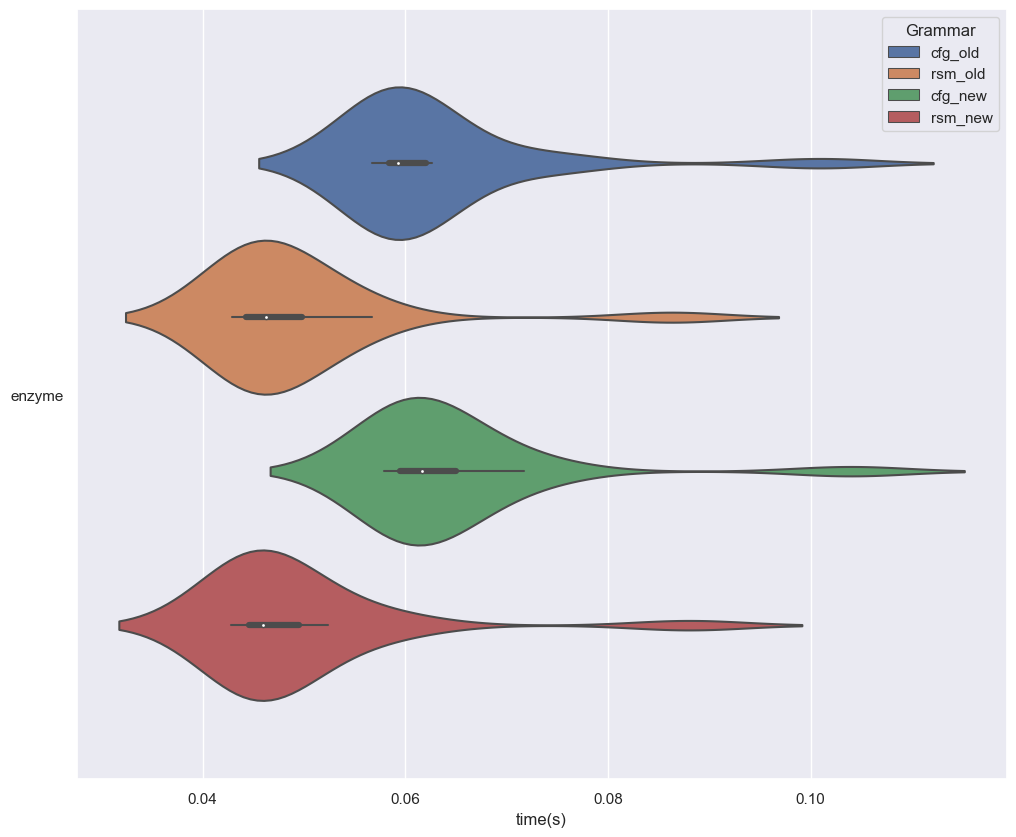

In [7]:
for graph in graphs:
    plt.clf()
    bp = sns.violinplot(
        data = dff[(dff.graph == graph)],
        x="time_s",
        y="graph",
        hue="Grammar",
    )
    bp.set(xlabel='time(s)', ylabel='')
    plt.savefig(f"{pics}/{target}/{graph}.png")